<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
Dataset Info:
 None

Missing Values:
 anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


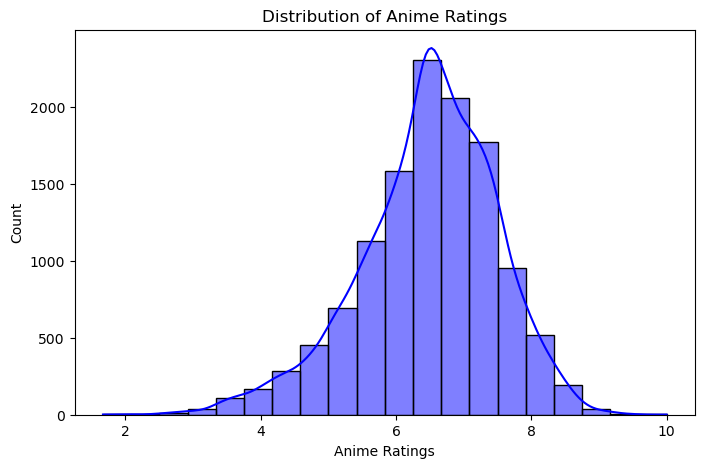

Recommendations for Naruto:
name
Stella no Mahou                                1.0
Namiuchigiwa no Muromi-san                     1.0
Spriggan                                       1.0
Inazuma Eleven: Saikyou Gundan Ogre Shuurai    1.0
Inazuma Eleven: Outer Code                     1.0
Name: Naruto, dtype: float64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
file_path = r"C:\Users\Owner\OneDrive\Desktop\SVM\Recomandation system\anime.csv"
df = pd.read_csv(file_path)

# ====== EXPLORATORY DATA ANALYSIS (EDA) ======
print("Dataset Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing ratings with the mean rating
df['rating'].fillna(df['rating'].mean(), inplace=True)

# Visualizing rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=20, kde=True, color='blue')
plt.xlabel('Anime Ratings')
plt.ylabel('Count')
plt.title('Distribution of Anime Ratings')
plt.show()

# ====== ITEM-BASED COLLABORATIVE FILTERING ======
# Creating item-item similarity matrix based on anime ratings
anime_ratings = df.pivot_table(index='name', values='rating', aggfunc='mean')

# Normalize ratings for better similarity computation
anime_ratings = (anime_ratings - anime_ratings.mean()) / anime_ratings.std()

# Compute cosine similarity between anime
similarity_matrix = cosine_similarity(anime_ratings, anime_ratings)

# Convert to DataFrame
anime_similarity_df = pd.DataFrame(similarity_matrix, index=anime_ratings.index, columns=anime_ratings.index)

# Function to recommend similar anime based on cosine similarity
def recommend_anime(title, num_recommendations=5):
    if title not in anime_similarity_df.index:
        return "Anime not found. Please check the title."
    
    similar_anime = anime_similarity_df[title].sort_values(ascending=False)[1:num_recommendations+1]
    return similar_anime

# Example recommendation
anime_title = "Naruto"
print(f"Recommendations for {anime_title}:")
print(recommend_anime(anime_title, num_recommendations=5))
